#### Imporing All necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading A Data

In [2]:
df=pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Basic Checks

In [3]:
df.columns # To check columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [10]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [11]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [12]:
df.isnull().sum() #Checking the Null Values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

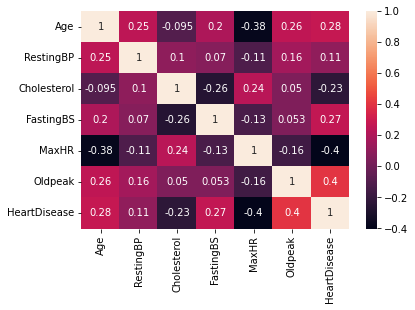

In [13]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

Creating a dataframe 'X'

In [14]:
X=df.drop('HeartDisease',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


#### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [16]:
X.Sex= enc.fit_transform(X.Sex)
X.ChestPainType= enc.fit_transform(X.ChestPainType)
X.RestingECG= enc.fit_transform(X.RestingECG)
X.ExerciseAngina= enc.fit_transform(X.ExerciseAngina)
X.Oldpeak= enc.fit_transform(X.Oldpeak)
X.ST_Slope= enc.fit_transform(X.ST_Slope)
X.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,10,2
1,49,0,2,160,180,0,1,156,0,20,1


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()
x= sc.fit_transform(X)
x

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.87246276,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.12037326, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.87246276,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.31894046, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.87246276, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.87246276,  1.05211381]])

In [19]:
x= pd.DataFrame(x,columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

In [20]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.872463,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.120373,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.872463,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.616791,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.872463,1.052114


In [21]:
y=df.HeartDisease
y.head() #Target Column

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.8,random_state=25)

## **Model Building**
### **1. LOGISTIC REGRESSION**

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8285714285714286

In [25]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print(scores)

[0.81081081 0.86486486 0.86486486 0.72222222 0.91666667]


In [26]:
confusion_matrix(y_test,y_predict)

array([[261,  62],
       [ 64, 348]])

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       323
           1       0.85      0.84      0.85       412

    accuracy                           0.83       735
   macro avg       0.83      0.83      0.83       735
weighted avg       0.83      0.83      0.83       735



### **2. SUPOPORT VECTOR CLASSIFIER**

In [28]:
from sklearn.svm import SVC
m2=SVC() #Defining the model
m2.fit(x_train,y_train) # Training the model
y_predict2= m2.predict(x_test)
accuracy_score(y_test,y_predict2)

0.8653061224489796

In [29]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(m2,x_train,y_train,cv=5,scoring='accuracy')
print(scores)

[0.83783784 0.83783784 0.89189189 0.75       0.91666667]


In [30]:
confusion_matrix(y_test,y_predict2)

array([[268,  55],
       [ 44, 368]])

In [31]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       323
           1       0.87      0.89      0.88       412

    accuracy                           0.87       735
   macro avg       0.86      0.86      0.86       735
weighted avg       0.87      0.87      0.87       735



### **3. Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
m3=RandomForestClassifier() #Defining the model
m3.fit(x_train,y_train) # Training the model
y_predict3= m3.predict(x_test)
accuracy_score(y_test,y_predict3)

0.8666666666666667

In [33]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(m3,x_train,y_train,cv=5,scoring='accuracy')
print(scores) 

[0.81081081 0.89189189 0.86486486 0.80555556 0.91666667]


In [34]:
confusion_matrix(y_test,y_predict3)

array([[267,  56],
       [ 42, 370]])

In [35]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       323
           1       0.87      0.90      0.88       412

    accuracy                           0.87       735
   macro avg       0.87      0.86      0.86       735
weighted avg       0.87      0.87      0.87       735



In [36]:
from sklearn.model_selection import GridSearchCV
 
parameters = {'max_depth':[5,10,15,20,30],
              'random_state': [0,1,2,3,4],
              'n_estimators':[10,30,50,70,100,150] 
             }
grid = GridSearchCV(m3,parameters,cv=5,verbose=1)
#grid = RandomizedSearchCV(model,parameters,cv=5)
grid.fit(X,y)           

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'n_estimators': [10, 30, 50, 70, 100, 150],
                         'random_state': [0, 1, 2, 3, 4]},
             verbose=1)

In [37]:
grid.best_score_

0.8430624851508673

In [38]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 3}

### **4. XGBClassifier**

In [39]:
from xgboost import XGBClassifier
m4=XGBClassifier() #Defining the model
m4.fit(x_train,y_train) # Training the model
y_predict4= m4.predict(x_test)
accuracy_score(y_test,y_predict4)

0.8489795918367347

In [40]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(m4,x_train,y_train,cv=5,scoring='accuracy')
print(scores)

[0.81081081 0.86486486 0.86486486 0.77777778 0.86111111]


In [41]:
confusion_matrix(y_test,y_predict4)

array([[263,  60],
       [ 51, 361]])

In [42]:
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       323
           1       0.86      0.88      0.87       412

    accuracy                           0.85       735
   macro avg       0.85      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



# The best suitable model with Score of **86.53** is Support vector classification Model 